# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # pause for 1 second using time.sleep() - avoiods the openweather API key from being disabled
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(3)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | morant bay
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | nurota
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | tame
Processing Record 17 of Set 1 | mejit
Processing Record 18 of Set 1 | camalu
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | port hueneme
Processing Record 22 of Set 1 | georgetown
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,80.96,77,72,8.08,TK,1741535225
1,west island,-12.1568,96.8225,84.18,89,100,8.05,CC,1741535230
2,morant bay,17.8815,-76.4093,83.07,71,36,10.16,JM,1741535234
3,port-aux-francais,-49.3500,70.2167,43.38,88,100,32.95,TF,1741535238
4,ushuaia,-54.8000,-68.3000,51.46,58,75,12.66,AR,1741535219


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,80.96,77,72,8.08,TK,1741535225
1,west island,-12.1568,96.8225,84.18,89,100,8.05,CC,1741535230
2,morant bay,17.8815,-76.4093,83.07,71,36,10.16,JM,1741535234
3,port-aux-francais,-49.3500,70.2167,43.38,88,100,32.95,TF,1741535238
4,ushuaia,-54.8000,-68.3000,51.46,58,75,12.66,AR,1741535219


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

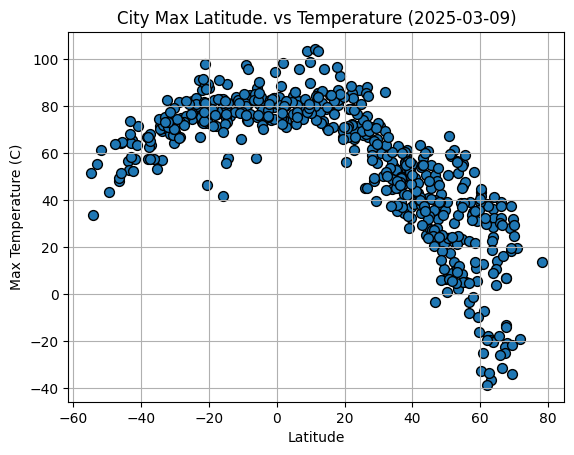

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
      
)

# Incorporate the other graph properties
plt.title("City Max Latitude. vs Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

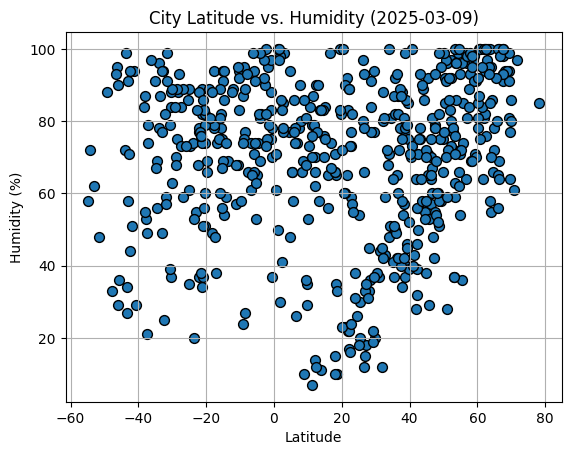

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50    
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

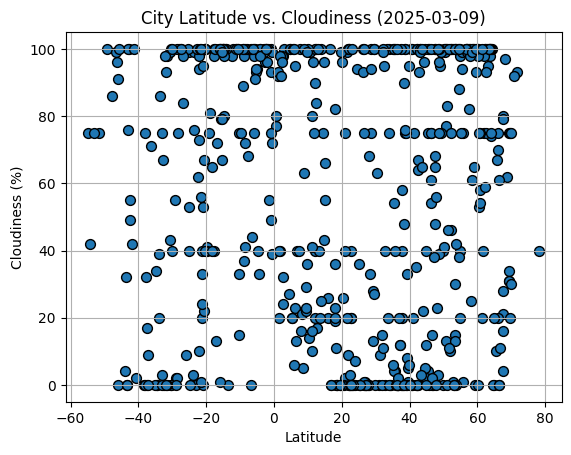

In [21]:
# Build the scatter plots for latitude vs. Cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50    
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

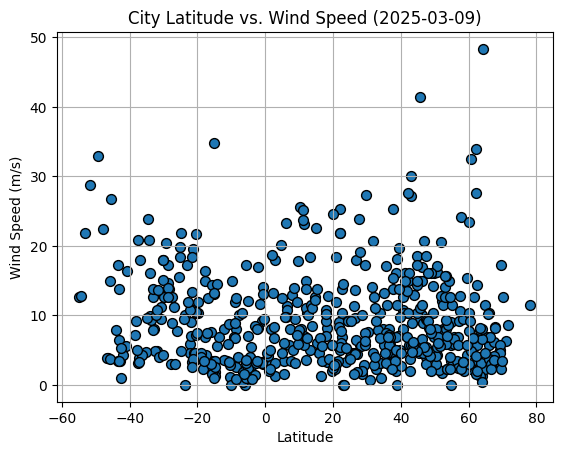

In [23]:
# Build the scatter plots for Latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50    
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values, y_values, s=20)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=  0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,morant bay,17.8815,-76.4093,83.07,71,36,10.16,JM,1741535234
5,bilibino,68.0546,166.4372,-20.74,94,97,3.98,RU,1741535246
6,hawaiian paradise park,19.5933,-154.9731,66.90,100,0,5.75,US,1741535250
7,lompoc,34.6391,-120.4579,54.14,81,0,8.05,US,1741535254
9,pacific grove,36.6177,-121.9166,39.31,87,0,5.75,US,1741535262


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,80.96,77,72,8.08,TK,1741535225
1,west island,-12.1568,96.8225,84.18,89,100,8.05,CC,1741535230
3,port-aux-francais,-49.3500,70.2167,43.38,88,100,32.95,TF,1741535238
4,ushuaia,-54.8000,-68.3000,51.46,58,75,12.66,AR,1741535219
8,saint-philippe,-21.3585,55.7679,79.59,82,40,10.83,RE,1741535258


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7081626307689066


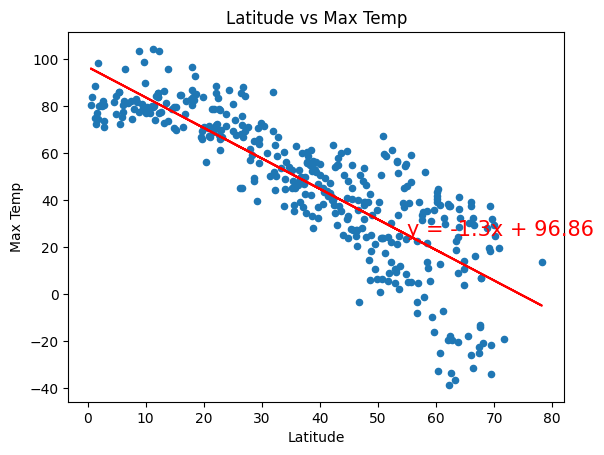

In [32]:
# Linear regression on Northern Hemisphere
plt.title("Latitude vs Max Temp")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (55, 25))


The r-value is: 0.3986749735476302


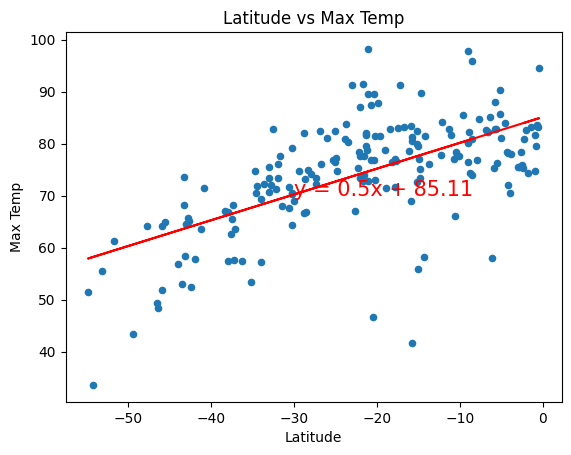

In [34]:
# Linear regression on Southern Hemisphere
plt.title("Latitude vs Max Temp")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (-30,70))


**Discussion about the linear relationship:** The high r value indicates a strong positive correlation between latitude and max temperature. R values is 0.27 ~ 0.3 that there is a weak positive correlation in the southern hemispher (due to the season).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09880694216542461


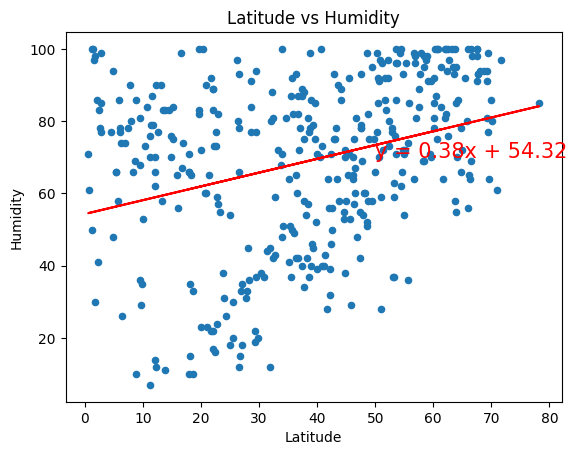

In [37]:
# Northern Hemisphere
plt.title("Latitude vs Humidity")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (50,70))

The r-value is: 0.03982201890505477


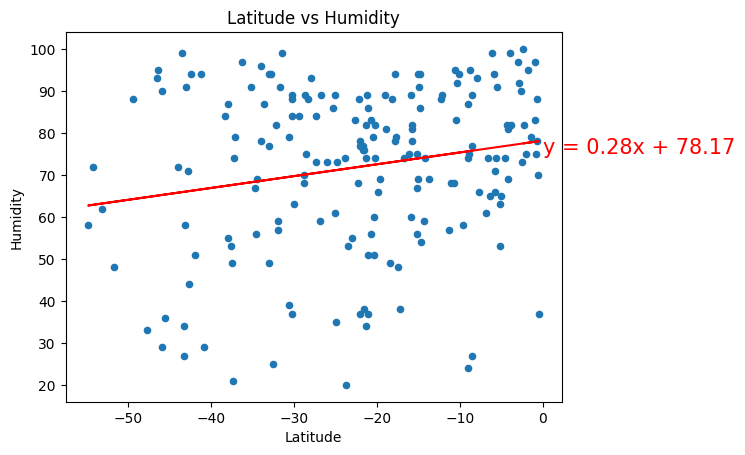

In [41]:
# Southern Hemisphere
plt.title("Latitude vs Humidity")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (0,75))

**Discussion about the linear relationship:** The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.016309127107969557


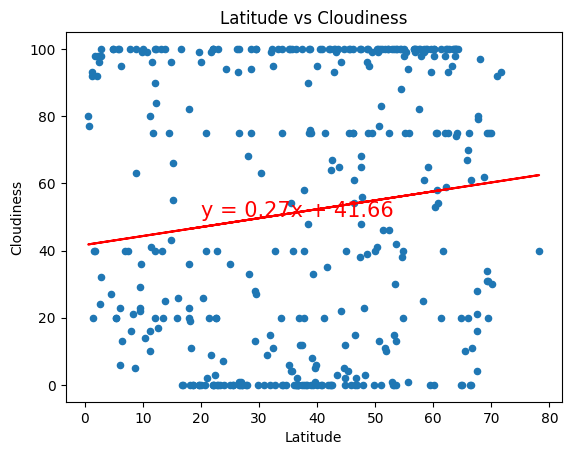

In [42]:
# Northern Hemisphere
plt.title("Latitude vs Cloudiness")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (20,50))

The r-value is: 0.11045179873351021


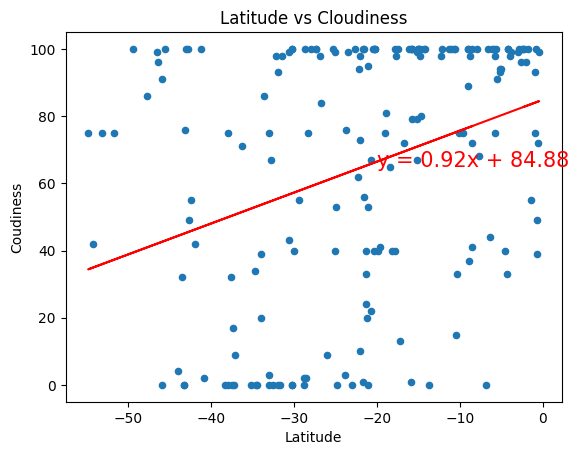

In [48]:
# Southern Hemisphere
plt.title("Latitude vs Cloudiness")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Coudiness", (-20,65))

**Discussion about the linear relationship:** The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002456274855998545


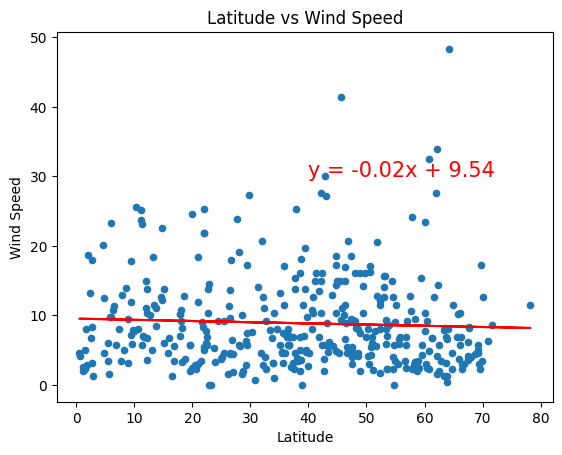

In [44]:
# Northern Hemisphere
plt.title("Latitude vs Wind Speed")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (40,30))


The r-value is: 0.112199187405935


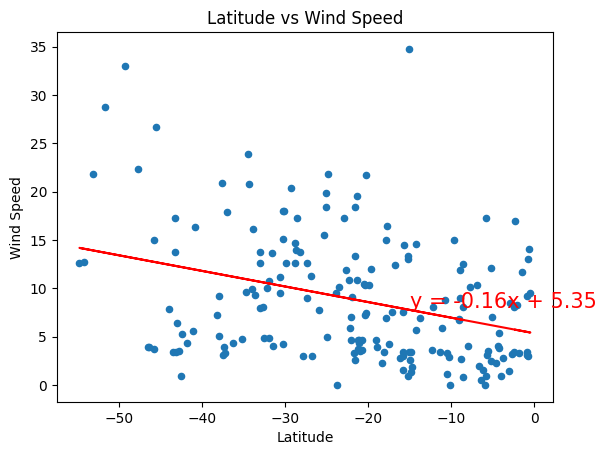

In [51]:
# Southern Hemisphere
plt.title("Latitude vs Wind Speed")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (-15,8))

**Discussion about the linear relationship:** The low r values indicate that there is no real relationship between wind speed and latitude.